In [1]:
import os

from coffea import processor
from coffea.nanoevents import NanoEventsFactory, BaseSchema

from coffea.analysis_tools import PackedSelection

import hist
import awkward as ak
import numpy as np
import sys

top_dir = '/afs/crc.nd.edu/user/a/atownse2/Public/RSTriPhoton'
sys.path.append(top_dir)

from analysis import analyze
from analysis.utils import sample_info
from analysis import plotting as p

import matplotlib as mpl

%matplotlib widget

import importlib


plot_dir = top_dir +'/plots/data/'

In [2]:
# Get files for processor

n_percent = 0.2 # Run over n% of all datasets
do_n_percent = False

#Set up dataset for processor
era = '2018'
tuple_version = 'FlatAODv2'
tupledir = f'/hadoop/store/user/atownse2/RSTriPhoton/data/{era}/{tuple_version}/'
trigger_index = sample_info.get_trigger_index('HLT_DoublePhoton70_v',era)

useXRD = True
#redirector = 'root://cmsxrootd.fnal.gov/'
redirector = "root://deepthought.crc.nd.edu/"
#redirector = "root://ndcms.crc.nd.edu/"
if useXRD:
    #dir = nanodir.replace('/hadoop', f'{redirector}/hadoop')

    dir = tupledir.replace('/hadoop', redirector)
else:
    dir = tupledir

datasets = {"EGamma" : {'files': [dir+f for f in os.listdir(tupledir) if 'EGamma' in f and '.root' in f]}}

if do_n_percent:
    for dataset in datasets:
        datasets[dataset]['files'] = datasets[dataset]['files'][1:int(n_percent*len(datasets[dataset]['files']))]



print('Example filename:')
print(datasets['EGamma']['files'][0])
print('Number of files:')
print(len(datasets['EGamma']['files']))

Example filename:
root://deepthought.crc.nd.edu//store/user/atownse2/RSTriPhoton/data/2018/FlatAODv2/EGamma_2018A_FlatAODv2_0.root
Number of files:
1891


In [3]:
importlib.reload(analyze)
#Make hists
executor = processor.futures_executor(workers=64) #64 max
#executor = processor.iterative_executor()

run = processor.Runner(
    executor=executor,
    schema = BaseSchema)

hists = run(datasets, '/flattener/tree', processor_instance=analyze.AnalysisProcessor())

Output()

Output()

/afs/crc.nd.edu/user/a/atownse2/miniconda3/envs/coffea-env/lib/python3.11/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered in divide
  result = getattr(ufunc, method)(


In [4]:
# Save hists
import pickle
data_info = {}

lumi = sample_info.lumi_dict[era]*.10
if do_n_percent:
    lumi = lumi*n_percent

data_info['lumi'] = lumi
data_info['hists'] = hists

with open(top_dir+'/pkl/data_info.pkl', 'wb') as fout:
    pickle.dump(data_info, fout)

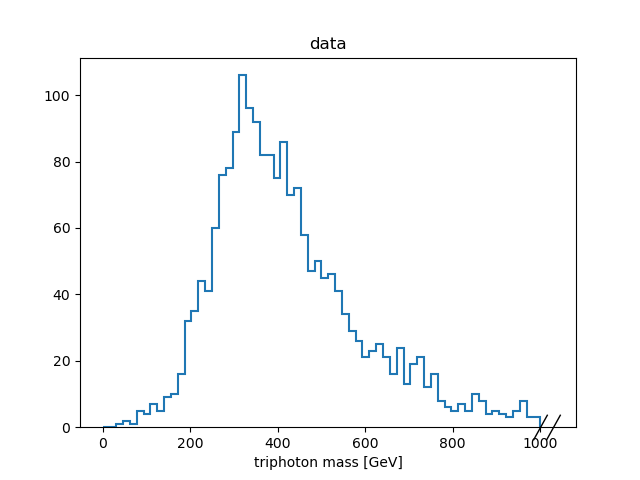

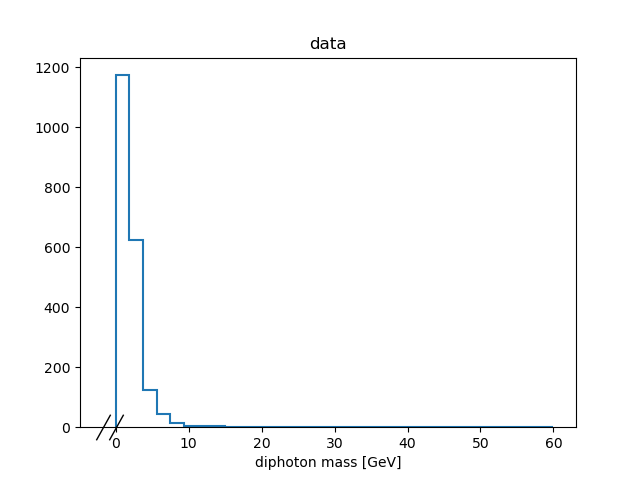

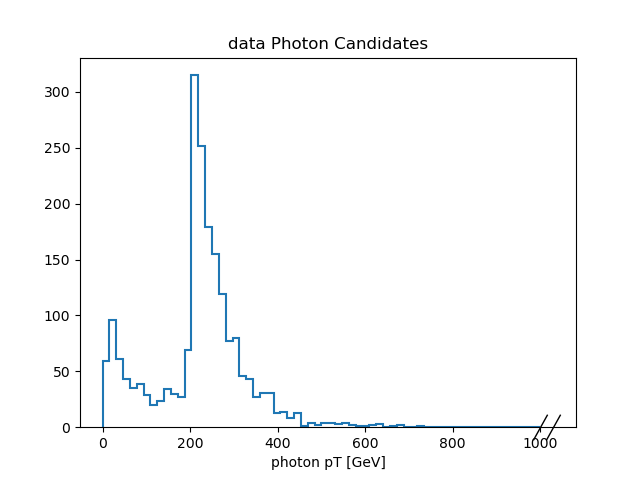

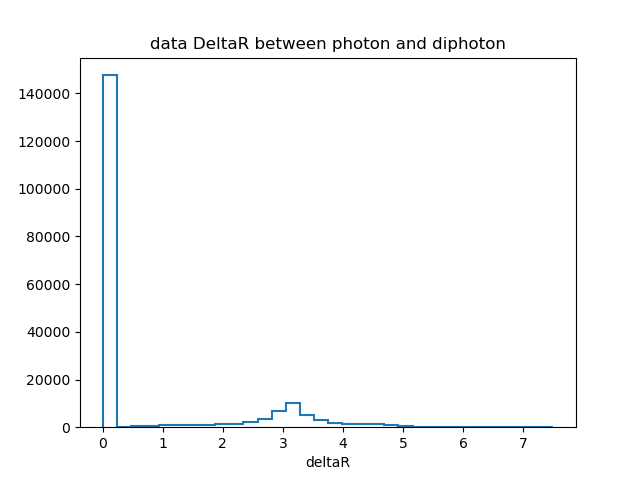

In [4]:
importlib.reload(p)
p.plot1d(hists['triphoton_mass'], title='data', save_as=plot_dir+'data_triphoton_mass.png')
p.plot1d(hists['diphoton_mass'], title='data', save_as=plot_dir+'data_diphoton_mass.png')
p.plot1d(hists['photon_pt'], title='data Photon Candidates', save_as=plot_dir+'data_photon_pt.png')
p.plot1d(hists['dr'], title='data DeltaR between photon and diphoton', save_as=plot_dir+'data_triphoton_dr.png')
p.plot2d(hists['triphoton_diphoton_mass'], title='data', save_as=plot_dir+'data_triphoton_diphoton_mass.png')